# Capstone Project - The Battle of the Neighbourhoods (Edmonton, Alberta, Canada)
##### *by Aarthi Velusamy* #####
### Applied Data Science Capstone Project


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

The aim of this project is to find a safe and secure location for opening of commercial establishments in Edmonton, Canada. Specifically, this report will be targeted to stakeholders interested in opening any business place like **Grocery Store** in **Edmonton City**, Canada.

The first task would be to **choose the safest borough (region)** by analysing crime data for opening a grocery store and **short listing a neighbourhood**, where grocery stores are not amongst the most commom venues, and yet **in little to no crime neighbourhood**.

We will make use of our data science tools to analyse data and focus on the safest borough and explore its neighborhoods and the 15 most common venues in each neighborhood so that the best neighborhood where grocery store is not amongst the most common venue can be selected.

## Data <a name="data"></a>

Based on definition of the problem, factors that will influence my decision are:
* finding the safest borough based on crime statistics
* finding the most common venues
* choosing the right neighbourhood within the borough

I will find out the best neighborhood in Edmonton for entrepreneurs to open a Grocery store by:
* Using multiple datasets from different sources (i.e. Web, Geocode, CSV files, Foursquare API)
* Python Webscraping using Beautifulsoup
* Data Preprocessing
* Data Analysis

I will be using the geographical coordinates of Edmonton to plot neighbourhoods in a borough that is safe and in the city's vicinity, and finally cluster the neighborhoods and present my findings.

Following data sources will be needed to extract/generate the required information:

- [**Part 1**: Using a real world data set from Open Data containing the Edmonton Crimes from 2009 to 2019](#part1):  A dataset consisting of the crime statistics of each Neighbourhood in Edmonton along with type of violation(crime), reported year, quarter, month and number of occurrences.

- [**Part 2**: Gathering additional information of the list of officially categorized boroughs in Edmonton from Wikipedia.](#part2): Borough information will be used to map the existing data where each neighbourhood can be assigned with the right borough.

- [**Part 3**: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.](#part3): This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

- [**Part 4**: Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.](#part4): This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

### **Part 1:** Using a real world data set from Open Data containing the Edmonton Neighbourhood Crimes from 2009 to 2019<a name="part1"></a>


####  Edmonton Crime Report 

Properties of the Crime Report

*   Neighbourhood Description (Occurrence)
*   Occurrence Violation Type Group
*   Occurrence Reported Year
*   Occurrence Reported Quarter
*   Occurrence Reported Month
*   #Of Occurrences

Data set URL: https://dashboard.edmonton.ca/dataset/EPS-Neighbourhood-Criminal-Occurrences/xthe-mnvi

### Importing all the necessary Libraries

In [845]:
import numpy as np
import pandas as pd

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.3.2
Libraries imported


In [846]:
# import webscraping library
!pip install beautifulsoup4
from bs4 import BeautifulSoup
print("Beautifulsoup imported")

Beautifulsoup imported


In [163]:
!pip install lxml

In [164]:
!pip install html5lib

### Reading from the Dataset

### Gathering Edmonton Neighbourhood crime dataset exported from the open data site<a name="part1"></a>
##### Edmonton Police Service (EPS) crimedataset [Wikipedia page](https://dashboard.edmonton.ca/dataset/EPS-Neighbourhood-Criminal-Occurrences/xthe-mnvi)

In [847]:
edm_crime_df = pd.read_csv('https://raw.githubusercontent.com/Aarthiv18/Capstone/main/Capstone%20Project%20-%20The%20Battle%20of%20Neighborhoods/EPS_Neighbourhood_Criminal_Occurrences.csv', index_col=None)
print("Dataset read completed")

Dataset read completed


In [848]:
edm_crime_df.head()

,Neighbourhood Description (Occurrence),Occurrence Violation Type Group,Occurrence Reported Year,Occurrence Reported Quarter,Occurrence Reported Month,# Occurrences
0,ABBOTTSFIELD,Assault,2009,Q1,1,3
1,ABBOTTSFIELD,Assault,2009,Q1,2,5
2,ABBOTTSFIELD,Assault,2009,Q1,3,2
3,ABBOTTSFIELD,Assault,2009,Q2,4,2
4,ABBOTTSFIELD,Assault,2009,Q2,5,6


#### Modifying the name of columns

In [849]:
edm_crime_df.columns = ['Neighbourhood', 'Crime Type','Year','Quarter','Month','Number Of Occurences']
edm_crime_df.head()

,Neighbourhood,Crime Type,Year,Quarter,Month,Number Of Occurences
0,ABBOTTSFIELD,Assault,2009,Q1,1,3
1,ABBOTTSFIELD,Assault,2009,Q1,2,5
2,ABBOTTSFIELD,Assault,2009,Q1,3,2
3,ABBOTTSFIELD,Assault,2009,Q2,4,2
4,ABBOTTSFIELD,Assault,2009,Q2,5,6


### Total Crimes in different Neighbourhoods

In [850]:
edm_crime_df['Neighbourhood'].value_counts()

Not Entered                 893
DOWNTOWN                    861
BOYLE STREET                790
OLIVER                      788
CENTRAL MCDOUGALL           784
                           ... 
CPR WEST                      2
RURAL NORTH WEST              1
RIVER VALLEY CAMERON          1
ANTHONY HENDAY CLAREVIEW      1
CLAREVIEW BUSINESS PARK       1
Name: Neighbourhood, Length: 393, dtype: int64

In [851]:
#list unique values in df column Neighbourhood
edm_crime_df.Neighbourhood.unique()

array(['ABBOTTSFIELD', 'ALBERTA AVENUE', 'ALDERGROVE', 'ALLENDALE',
       'AMBLESIDE', 'ANTHONY HENDAY', 'ANTHONY HENDAY BIG LAKE',
       'ANTHONY HENDAY SOUTH EAST', 'ANTHONY HENDAY SOUTH WEST', 'ARGYLL',
       'ARMSTRONG INDUSTRIAL', 'ATHLONE', 'AVONMORE', 'BALWIN',
       'BANNERMAN', 'BARANOW', 'BATURYN', 'BEACON HEIGHTS', 'BEARSPAW',
       'BEAUMARIS', 'BELGRAVIA', 'BELLE RIVE', 'BELLEVUE', 'BELMEAD',
       'BELMONT', 'BELVEDERE', 'BERGMAN', 'BEVERLY HEIGHTS', 'BISSET',
       'BLACKBURNE', 'BLACKMUD CREEK', 'BLUE QUILL', 'BONNIE DOON',
       'BOYLE STREET', 'BRANDER GARDENS', 'BRECKENRIDGE GREENS',
       'BRINTNELL', 'BRITANNIA YOUNGSTOWN', 'BROOKSIDE',
       'BROWN INDUSTRIAL', 'BULYEA HEIGHTS', 'CAERNARVON', 'CALDER',
       'CALGARY TRAIL NORTH', 'CALGARY TRAIL SOUTH', 'CALLINGWOOD NORTH',
       'CALLINGWOOD SOUTH', 'CANON RIDGE', 'CANORA', 'CANOSSA',
       'CAPILANO', 'CARLETON SQUARE INDUSTRIAL', 'CARLISLE', 'CARLTON',
       'CASSELMAN', 'CENTRAL MCDOUGALL', 'CHAM

In [852]:
edm_crime_df.isnull().sum()

Neighbourhood           0
Crime Type              0
Year                    0
Quarter                 0
Month                   0
Number Of Occurences    0
dtype: int64

In [853]:
edm_crime_df.shape

(113077, 6)

##### Further Cleaning the data by dropping rows with invalid data

In [854]:
edm_crime_df1=edm_crime_df[edm_crime_df != 'Not Entered']

In [855]:
# Top 30 Neighbourhood high in crime rate
edm_crime_df1['Neighbourhood'].value_counts().head(30)

DOWNTOWN                861
BOYLE STREET            790
OLIVER                  788
CENTRAL MCDOUGALL       784
MCCAULEY                770
ALBERTA AVENUE          750
STRATHCONA              731
EASTWOOD                722
QUEEN MARY PARK         713
SUMMERLEA               711
INGLEWOOD               697
SPRUCE AVENUE           690
BELVEDERE               689
EMPIRE PARK             663
PARKDALE                657
MONTROSE                644
QUEEN ALEXANDRA         642
GARNEAU                 640
GLENWOOD                637
CALDER                  635
WESTWOOD                623
BONNIE DOON             621
WESTMOUNT               618
BRITANNIA YOUNGSTOWN    617
CANORA                  615
CALLINGWOOD SOUTH       611
BEACON HEIGHTS          607
KILLARNEY               606
BALWIN                  600
GLENGARRY               597
Name: Neighbourhood, dtype: int64

In [856]:
edm_crime_df1.shape

(113077, 6)

### **Part 2:** Gathering additional information of officially categorized boroughs in Edmonton from Wikipedia<a name="part2"></a>

##### As part of data set Borough which the neighborhood was part of, is not categorized, so separate csv file was created based on the data in the following wikipedia page [Wikipedia page](https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Edmonton).

In [857]:
edm_neigh_bor = pd.read_csv('https://raw.githubusercontent.com/Aarthiv18/Capstone/main/Capstone%20Project%20-%20The%20Battle%20of%20Neighborhoods/Borough.csv', index_col=None)
print("Dataset read completed")

Dataset read completed


In [858]:
edm_neigh_bor.head()

,Neighbourhood Description (Occurrence),Borough,Area
0,ABBOTTSFIELD,East,Beverly
1,ALBANY,North,The Palisades
2,ALBERTA AVENUE,East,The Avenue
3,ALBERTA PARK INDUSTRIAL,Northwest,Northwest Industrial
4,ALDERGROVE,West,West Jasper Place


In [859]:
edm_neigh_bor.Area.unique()

array(['Beverly', 'The Palisades', 'The Avenue', 'Northwest Industrial',
       'West Jasper Place', 'Heritage Valley', 'Greater Strathcona',
       'Windermere', 'Transportation and utility corridor', 'Mill Creek',
       nan, 'The Meadows', 'Clareview', 'Castle Downs', 'Yellowbird',
       'Lake District', 'Greater Highlands', 'Ridgewood',
       'Whitemud Creek Ravine and southwest sector', 'Blue Quill',
       'Greater Bonnie Doon', 'Central core north', 'Riverbend',
       'Lewis Farms', 'Pilot Sound', 'Jasper Place', 'Hermitage',
       'Greater Hardisty', 'Northeast Industrial', 'Central core south',
       'Southeast Industrial', 'Southwood', 'Casselman-Steele Heights',
       'Knottwood', 'Ellerslie', 'Dickinsfield', 'Horse Hill',
       'The Grange', 'Woodvale', 'Goodridge Corners',
       'Terwillegar Heights', 'Big Lake', 'Burnewood', 'Lakewood',
       'Londonderry', 'Millbourne', 'Millhurst', 'Mill Woods Centre',
       'North Saskatchewan River valley', 'Riverview'], dty

In [860]:
edm_neigh_bor['Area'] = edm_neigh_bor['Area'].str.replace('Whitemud Creek Ravine and southwest sector', 'Whitemud Creek Ravine')
edm_neigh_bor.Area.unique()

array(['Beverly', 'The Palisades', 'The Avenue', 'Northwest Industrial',
       'West Jasper Place', 'Heritage Valley', 'Greater Strathcona',
       'Windermere', 'Transportation and utility corridor', 'Mill Creek',
       nan, 'The Meadows', 'Clareview', 'Castle Downs', 'Yellowbird',
       'Lake District', 'Greater Highlands', 'Ridgewood',
       'Whitemud Creek Ravine', 'Blue Quill', 'Greater Bonnie Doon',
       'Central core north', 'Riverbend', 'Lewis Farms', 'Pilot Sound',
       'Jasper Place', 'Hermitage', 'Greater Hardisty',
       'Northeast Industrial', 'Central core south',
       'Southeast Industrial', 'Southwood', 'Casselman-Steele Heights',
       'Knottwood', 'Ellerslie', 'Dickinsfield', 'Horse Hill',
       'The Grange', 'Woodvale', 'Goodridge Corners',
       'Terwillegar Heights', 'Big Lake', 'Burnewood', 'Lakewood',
       'Londonderry', 'Millbourne', 'Millhurst', 'Mill Woods Centre',
       'North Saskatchewan River valley', 'Riverview'], dtype=object)

##### Further Cleaning the data by dropping rows with invalid data

In [861]:
edm_neigh_bor.isnull().sum()

Neighbourhood Description (Occurrence)     0
Borough                                   27
Area                                      88
dtype: int64

In [862]:
edm_neigh_bor.shape

(389, 3)

In [863]:
edm_neigh_bor1=edm_neigh_bor[edm_neigh_bor['Borough'].notna()]

In [864]:
edm_neigh_bor1.shape

(362, 3)

In [865]:
edm_neigh_bor1.columns = ['Neighbourhood','Borough', 'Area']
edm_neigh_bor1.head()

,Neighbourhood,Borough,Area
0,ABBOTTSFIELD,East,Beverly
1,ALBANY,North,The Palisades
2,ALBERTA AVENUE,East,The Avenue
3,ALBERTA PARK INDUSTRIAL,Northwest,Northwest Industrial
4,ALDERGROVE,West,West Jasper Place


### Gathering Latitude, longitude and Postal code information about the Neighborhood from Wikipedia

##### Data webscraped from the following page [Wikipedia page](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T).

In [866]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T')[1]
#print(table)
postcode=pd.DataFrame(table)
#postcode.head(10)
postcode

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
176,T6Z,Not assigned,Not assigned,Not assigned,Not assigned
177,T7Z,Stony Plain,Not assigned,53.5202,-114.0135
178,T8Z,Not assigned,Not assigned,Not assigned,Not assigned


#### Further cleaning the data to include only Edmonton Postal codes

In [867]:
postcode1=postcode.loc[postcode['Borough']=='Edmonton']
postcode1.shape

(39, 5)

#### Split column neighbourood into multiple rows in pandas dataframe

In [868]:
postcode1=postcode.loc[postcode['Borough']=='Edmonton']
#postcode1.shape
postcode1 = (postcode1.set_index(['Postal Code', 'Borough', 'Latitude', 'Longitude'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index()) 
#postcode1
Neighlist= postcode1['Neighborhood'].tolist()
print(f"\nNeigh list:\n{Neighlist}\ntype:{type(Neighlist)}")



Neigh list:
['West Clareview', ' East Londonderry', 'North Capilano', 'East North Central', ' West Beverly', 'SE Capilano', ' West Southeast Industrial', ' East Bonnie Doon', 'Central Londonderry', 'Central Bonnie Doon', 'West Londonderry', ' East Calder', 'South Bonnie Doon', ' East University', 'North Central', ' Queen Mary Park', ' Blatchford', 'West University', ' Strathcona Place', 'NorthDowntown Fringe', ' East Downtown Fringe', 'Southgate', ' North Riverbend', 'North Downtown', 'Kaskitayo', ' Aspen Gardens', 'South Downtown', ' South Downtown Fringe (Alberta Provincial Government)', 'West Mill Woods', 'North Westmount', ' West Calder', ' East Mistatim', 'East Mill Woods', 'South Westmount', ' Groat Estate', ' East Northwest Industrial', 'Southwest Edmonton', 'Glenora', ' SW Downtown Fringe', 'South Industrial', 'North Jasper Place', 'East Southeast Industrial', ' South Clover Bar', 'Central Jasper Place', ' Buena Vista', 'Southgate', ' North Riverbend', 'West Northwest Industri

### Merging the Crime data Table to include Boroughs and Area

In [869]:
edm_boroughs_crime = pd.merge(edm_crime_df1,edm_neigh_bor1, on='Neighbourhood')
edm_boroughs_crime.head()

,Neighbourhood,Crime Type,Year,Quarter,Month,Number Of Occurences,Borough,Area
0,ABBOTTSFIELD,Assault,2009,Q1,1,3,East,Beverly
1,ABBOTTSFIELD,Assault,2009,Q1,2,5,East,Beverly
2,ABBOTTSFIELD,Assault,2009,Q1,3,2,East,Beverly
3,ABBOTTSFIELD,Assault,2009,Q2,4,2,East,Beverly
4,ABBOTTSFIELD,Assault,2009,Q2,5,6,East,Beverly


##### Rearranging the column sequence

In [870]:
edm_bor_crime=edm_boroughs_crime[['Neighbourhood','Area','Borough','Crime Type','Year','Quarter','Month','Number Of Occurences']]
edm_bor_crime.head()

,Neighbourhood,Area,Borough,Crime Type,Year,Quarter,Month,Number Of Occurences
0,ABBOTTSFIELD,Beverly,East,Assault,2009,Q1,1,3
1,ABBOTTSFIELD,Beverly,East,Assault,2009,Q1,2,5
2,ABBOTTSFIELD,Beverly,East,Assault,2009,Q1,3,2
3,ABBOTTSFIELD,Beverly,East,Assault,2009,Q2,4,2
4,ABBOTTSFIELD,Beverly,East,Assault,2009,Q2,5,6


In [871]:
pivot_count = edm_bor_crime.pivot_table(values="Neighbourhood", index="Borough", aggfunc=pd.Series.nunique)
print(pivot_count)

             Neighbourhood
Borough                   
Central                 12
Centralwest              1
East                    19
Mature area              2
North                   45
Northeast               28
Northwest               43
South                   36
Southeast               64
Southwest               50
West                    62


In [872]:
edm_bor_crime.pivot_table(
        values='Neighbourhood', 
        index=['Borough', 'Area'], 
        
        aggfunc=pd.Series.nunique)

Neighbourhood
Borough     Area                                              
Central     Central core north                               8
            Central core south                               4
East        Beverly                                          5
            Greater Highlands                                6
            The Avenue                                       7
Mature area Northeast Industrial                             2
North       Castle Downs                                    10
            Dickinsfield                                     2
            Goodridge Corners                                1
            Lake District                                    8
            Londonderry                                      2
            The Palisades                                    6
            Transportation and utility corridor              2
Northeast   Casselman-Steele Heights                         4
            Clareview                                        8
            Hermitage                                        3
            Horse Hill                                       1
            Northeast Industrial                             2
            Pilot Sound                                      5
            Transportation and utility corridor              3
Northwest   Big Lake                                         2
            Northwest Industrial                            32
            Transportation and utility corridor              3
South       Greater Bonnie Doon                              8
            Greater Hardisty                                 3
            Greater Strathcona                              11
            Mill Creek                                       5
Southeast   Burnewood                                        2
            Ellerslie                                        3
            Knottwood                                        3
            Lakewood                                         3
            Mill Woods Centre                                2
            Millbourne                                       4
            Millhurst                                        2
            Northeast Industrial                             1
            Ridgewood                                        3
            Southeast Industrial                            21
            Southwood                                        3
            The Meadows                                      7
            Transportation and utility corridor              1
            Woodvale                                         2
Southwest   Blue Quill                                       4
            Heritage Valley                                 15
            Riverbend                                        9
            Terwillegar Heights                              7
            Whitemud Creek Ravine                            3
            Windermere                                       5
            Yellowbird                                       2
West        Jasper Place                                    14
            Lewis Farms                                      7
            North Saskatchewan River valley                  1
            Riverview                                        2
            The Grange                                       3
            Transportation and utility corridor              2
            West Jasper Place                               17

##### Further Cleaning the data by dropping rows with invalid data

In [873]:
edm_bor_crime.isnull().sum()

Neighbourhood               0
Area                    18624
Borough                     0
Crime Type                  0
Year                        0
Quarter                     0
Month                       0
Number Of Occurences        0
dtype: int64

In [874]:
edm_bor_crime.count()

Neighbourhood           108716
Area                     90092
Borough                 108716
Crime Type              108716
Year                    108716
Quarter                 108716
Month                   108716
Number Of Occurences    108716
dtype: int64

In [875]:
edm_bor_crime=edm_bor_crime[edm_bor_crime['Area'].notna()]

In [876]:
edm_bor_crime=edm_bor_crime[edm_bor_crime['Borough'] != 'Mature area']

In [877]:
edm_bor_crime.count()

Neighbourhood           89647
Area                    89647
Borough                 89647
Crime Type              89647
Year                    89647
Quarter                 89647
Month                   89647
Number Of Occurences    89647
dtype: int64

In [878]:
edm_bor_crime.isnull().sum()

Neighbourhood           0
Area                    0
Borough                 0
Crime Type              0
Year                    0
Quarter                 0
Month                   0
Number Of Occurences    0
dtype: int64

In [879]:
# checking the df datatype
edm_bor_crime.dtypes

Neighbourhood           object
Area                    object
Borough                 object
Crime Type              object
Year                     int64
Quarter                 object
Month                    int64
Number Of Occurences     int64
dtype: object

## Methodology<a name="methodology"></a>

Categorized the methodology section into two parts:

- [**Exploratory Data Analysis**:](#eda) Visualise the crime repots in different Edmonton boroughs to idenity the safest borough and normalise the neighborhoods of that borough. We will Use the resulting data and find 10 most common venues in each neighborhood.


- [**Modelling**:](#mdl) To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.

### Exploratory Data Analysis

#### Overview of Edmonton Boroughs (Geographical sectors) and neighbourhood

In [880]:
print('Edmonton has {} Geographical Regions and {} neighborhoods.'.format(
        len(edm_bor_crime['Borough'].unique()),
        len(edm_bor_crime['Neighbourhood'].unique()),
    )
)


Edmonton has 9 Geographical Regions and 299 neighborhoods.


#### Pivoting the table to better understand the data by crimes per borough (region)

In [881]:
edm_crime_pivot = pd.pivot_table(edm_bor_crime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Crime Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)#.sort_values('All', ascending=False).drop('All', axis=1).sort_values('All', ascending=False, axis=1).drop('All') # sort by row and column sum
edm_crime_pivot.sort_values(by=('Year', 'All'), ascending=False,inplace=True)
edm_crime_pivot.reset_index(inplace = True)
edm_crime_pivot.columns = edm_crime_pivot.columns.map(''.join)
edm_crime_pivot.rename(columns={'YearAll':'Total'}, inplace=True)
edm_crime_pivot
edm_crime_piv = edm_crime_pivot.iloc[1:]
                                
edm_crime_piv
#edm_crime_pivot_sort = edm_crime_pivot.reindex(edm_crime_pivot['Year'].sort_values(by=Year, ascending=False).index)

,Borough,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
1,Southeast,3227,3856,22,794,712,4617,3278,644,17150
2,West,2670,2917,21,1080,757,3475,2437,303,13660
3,South,1865,2507,10,696,503,2726,1891,243,10441
4,North,1741,2026,19,593,467,2656,1893,256,9651
5,East,1920,1853,40,1029,658,2006,1756,196,9458
6,Northeast,1670,1442,8,460,409,2042,1533,192,7756
7,Central,1277,1335,53,967,772,1372,1175,330,7281
8,Southwest,1170,1839,11,335,246,2223,1143,286,7253
9,Northwest,742,1876,5,122,112,2124,1519,497,6997


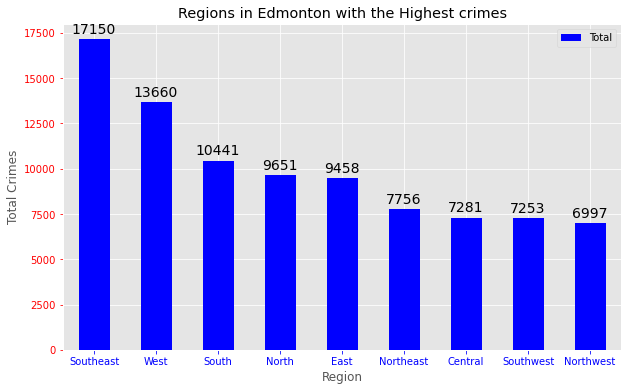

In [882]:
per_region = edm_crime_piv[['Borough','Total']]

per_region.set_index('Borough',inplace = True)

ax = per_region.plot(kind='bar', figsize=(10, 6), rot=0, color='b')

ax.set_ylabel('Total Crimes')
ax.set_xlabel('Region')
ax.set_title('Regions in Edmonton with the Highest crimes')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [883]:
#edm_crime_pivot.reset_index(inplace = True)
edm_crime_pivot.columns = edm_crime_pivot.columns.map(''.join)
edm_crime_pivot.rename(columns={'Borough':'Region',
                              'YearAssault' : 'Assault',
                              'YearBreak and Enter' : 'Break and Enter',
                              'YearHomicide' : 'Homicide',
                              'YearRobbery' : 'Robbery',
                              'YearSexual Assaults' : 'Sexual Assaults',
                              'YearTheft From Vehicle' : 'Theft from Vehicle',
                              'YearTheft Of Vehicle' : 'Theft Of Vehicle',
                              'YearTheft Over $5000' : 'Theft Over $5000'}, inplace=True)
# To ignore bottom All in Borough
edm_crime_pivot1 = edm_crime_pivot.tail(9)
edm_crime_pivot1 = edm_crime_pivot1.iloc[:, :-1]
edm_crime_pivot1

,Region,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft from Vehicle,Theft Of Vehicle,Theft Over $5000
1,Southeast,3227,3856,22,794,712,4617,3278,644
2,West,2670,2917,21,1080,757,3475,2437,303
3,South,1865,2507,10,696,503,2726,1891,243
4,North,1741,2026,19,593,467,2656,1893,256
5,East,1920,1853,40,1029,658,2006,1756,196
6,Northeast,1670,1442,8,460,409,2042,1533,192
7,Central,1277,1335,53,967,772,1372,1175,330
8,Southwest,1170,1839,11,335,246,2223,1143,286
9,Northwest,742,1876,5,122,112,2124,1519,497


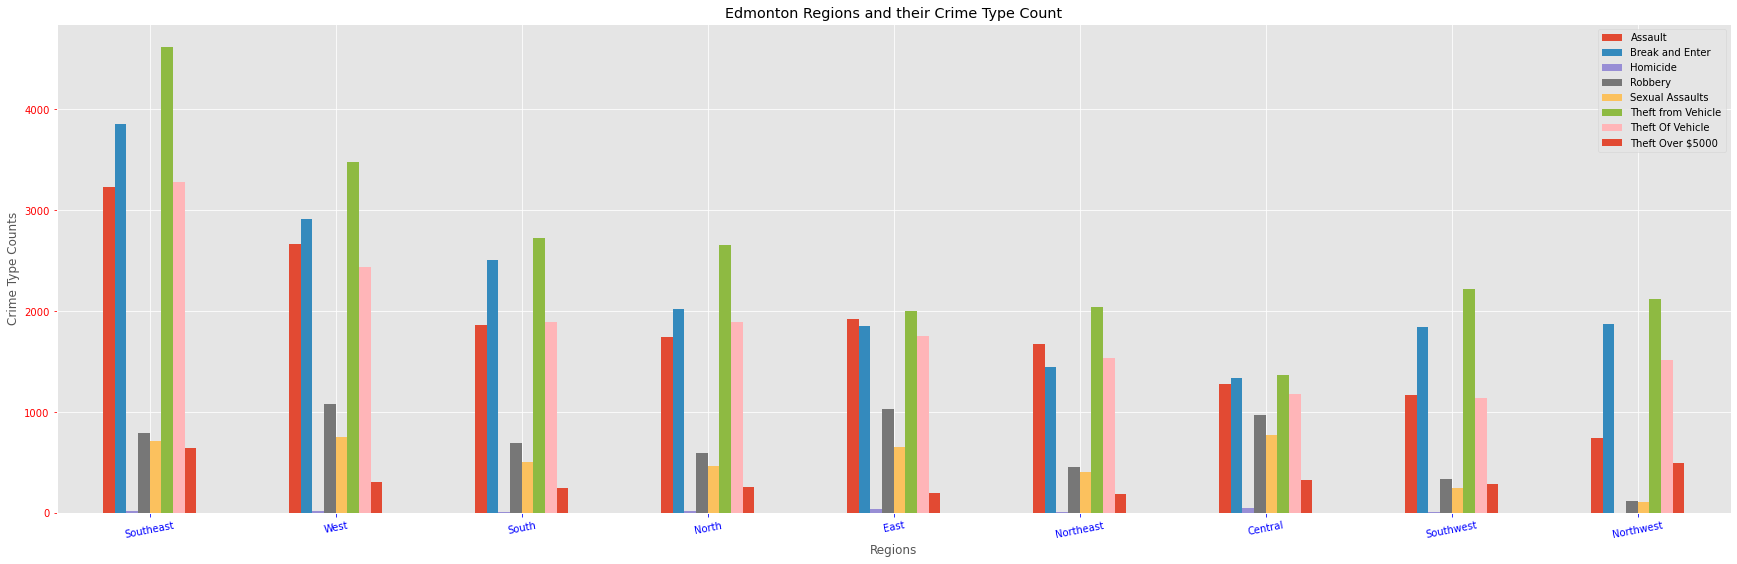

In [884]:
ploh = edm_crime_pivot1[['Region','Assault','Break and Enter','Homicide','Robbery','Sexual Assaults','Theft from Vehicle','Theft Of Vehicle','Theft Over $5000']]
ploh.set_index('Region',inplace = True)
#edm_crime_pivot.plot.bar(rot=0)
ax=ploh.plot(kind='bar',figsize=(30, 9), rot=11)
#set descriptions
ax.set_ylabel('Crime Type Counts')
ax.set_xlabel('Regions')
ax.set_title('Edmonton Regions and their Crime Type Count')
#set tick colors
ax=plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')


plt.show()

In [885]:
edm_tot = pd.pivot_table(edm_bor_crime,
                               
                               index=['Crime Type'],
                              
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
edm_tot
edm_crime_df

,Neighbourhood,Crime Type,Year,Quarter,Month,Number Of Occurences
0,ABBOTTSFIELD,Assault,2009,Q1,1,3
1,ABBOTTSFIELD,Assault,2009,Q1,2,5
2,ABBOTTSFIELD,Assault,2009,Q1,3,2
3,ABBOTTSFIELD,Assault,2009,Q2,4,2
4,ABBOTTSFIELD,Assault,2009,Q2,5,6
...,...,...,...,...,...,...
113072,YORK,Theft Over $5000,2019,Q1,1,2
113073,YORK,Theft Over $5000,2019,Q2,6,1
113074,YORK,Theft Over $5000,2019,Q3,8,2
113075,YOUNGSTOWN INDUSTRIAL,Theft Over $5000,2019,Q2,5,1


#### Pivoting the table to better understand the data by crimes per neighbourhood

In [886]:
edm_crime_pivot1 = pd.pivot_table(edm_bor_crime,
                               values=['Year'],
                               index=['Neighbourhood'],
                               columns=['Crime Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
edm_crime_pivot1.sort_values(by=('Year', 'All'), ascending=False,inplace=True)
edm_crime_pivot1.reset_index(inplace = True)
edm_crime_pivot1.columns = edm_crime_pivot1.columns.map(''.join)
edm_crime_pivot1.rename(columns={'YearAll':'Total'}, inplace=True)
edm_crime_pivot1.head(30)

,Neighbourhood,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
0,All,16282,19651,189,6076,4636,23241,16625,2947,89647
1,DOWNTOWN,131,131,12,131,117,131,130,78,861
2,BOYLE STREET,131,126,10,117,113,131,125,37,790
3,OLIVER,131,130,7,119,97,130,129,45,788
4,CENTRAL MCDOUGALL,131,125,7,119,102,131,126,43,784
5,MCCAULEY,131,127,10,125,100,130,126,21,770
6,ALBERTA AVENUE,131,131,12,116,81,131,130,18,750
7,STRATHCONA,130,130,2,109,75,131,126,28,731
8,EASTWOOD,131,130,3,121,65,126,128,18,722
9,QUEEN MARY PARK,131,128,4,94,69,131,130,26,713


##### To view some basic statistical details on pivot results

In [887]:
edm_crime_pivot.describe()

,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft from Vehicle,Theft Of Vehicle,Theft Over $5000,Total
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,3256.400000,3930.200000,37.80000,1215.200000,927.200000,4648.200000,3325.000000,589.400000,17929.40000
std,4632.486042,5574.355225,55.21433,1735.774102,1321.441872,6595.397921,4715.294476,840.304204,25405.62367
min,742.000000,1335.000000,5.00000,122.000000,112.000000,1372.000000,1143.000000,192.000000,6997.00000
25%,1375.250000,1842.500000,10.25000,493.250000,423.500000,2062.500000,1522.500000,246.250000,7399.75000
50%,1803.000000,1951.000000,20.00000,745.000000,580.500000,2439.500000,1823.500000,294.500000,9554.50000
75%,2482.500000,2814.500000,35.50000,1013.500000,745.750000,3287.750000,2301.000000,455.250000,12855.25000
max,16282.000000,19651.000000,189.00000,6076.000000,4636.000000,23241.000000,16625.000000,2947.000000,89647.00000


#### Exploring the data by Visualising

##### Top 5 Neighbourhood in Edmonton with the highest crime

In [888]:
edm_crime_pivot1.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

edm_crime_top5 = edm_crime_pivot1.iloc[1:6]
edm_crime_top5

,Neighbourhood,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
1,DOWNTOWN,131,131,12,131,117,131,130,78,861
2,BOYLE STREET,131,126,10,117,113,131,125,37,790
3,OLIVER,131,130,7,119,97,130,129,45,788
4,CENTRAL MCDOUGALL,131,125,7,119,102,131,126,43,784
5,MCCAULEY,131,127,10,125,100,130,126,21,770


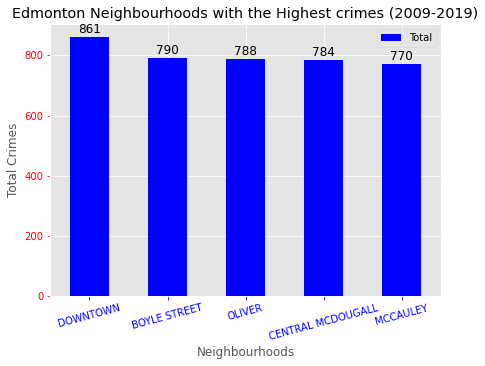

In [889]:
Top5_crime_neigh = edm_crime_top5[['Neighbourhood','Total']]
Top5_crime_neigh.set_index('Neighbourhood',inplace = True)

#plot the data
my_colors = 'b'
ax = Top5_crime_neigh.plot(kind='bar', figsize=(7, 5), rot=15, color=my_colors)

#set descriptions
ax.set_ylabel('Total Crimes')
ax.set_xlabel('Neighbourhoods')
ax.set_title('Edmonton Neighbourhoods with the Highest crimes (2009-2019)')

#set tick colors
ax=plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

for p in ax.patches:
    ax.annotate(str(p.get_height()), #annotate bar with values ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

##### Area with the lowest crime

In [890]:
edm_crime_area = pd.pivot_table(edm_bor_crime,
                               values=['Year'],
                               index=['Area'],
                               columns=['Crime Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
edm_crime_area.sort_values(by=('Year', 'All'), ascending=True,inplace=True)
edm_crime_area.reset_index(inplace = True)
edm_crime_area.columns = edm_crime_area.columns.map(''.join)
edm_crime_area.rename(columns={'YearAll':'Total'}, inplace=True)
edm_crime_area

,Area,YearAssault,YearBreak and Enter,YearHomicide,YearRobbery,YearSexual Assaults,YearTheft From Vehicle,YearTheft Of Vehicle,YearTheft Over $5000,Total
0,North Saskatchewan River valley,0,0,0,0,0,0,1,0,1
1,Riverview,3,13,0,0,1,6,3,3,29
2,Whitemud Creek Ravine,9,1,0,0,1,22,2,0,35
3,Big Lake,8,43,0,0,0,55,21,14,141
4,Horse Hill,57,41,0,5,15,42,30,3,193
5,Transportation and utility corridor,113,35,0,9,10,74,51,15,307
6,Goodridge Corners,80,106,0,18,19,101,71,15,410
7,Yellowbird,103,123,1,59,15,168,112,17,598
8,Woodvale,141,126,1,23,28,184,112,3,618
9,Burnewood,159,129,1,30,35,198,133,18,703


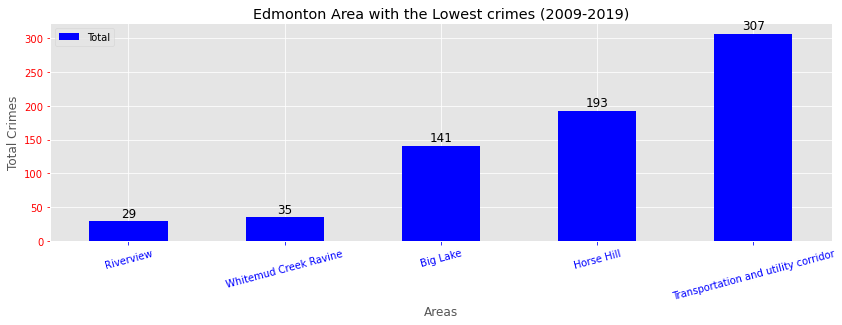

In [891]:
edm_areacrime_bot5 = edm_crime_area.iloc[1:6]
bot5_crime_area = edm_areacrime_bot5[['Area','Total']]
bot5_crime_area.set_index('Area',inplace = True)

#plot the data
my_colors = 'b'
ax = bot5_crime_area.plot(kind='bar', figsize=(14, 4), rot=15, color=my_colors)

#set descriptions
ax.set_ylabel('Total Crimes')
ax.set_xlabel('Areas')
ax.set_title('Edmonton Area with the Lowest crimes (2009-2019)')

#set tick colors
ax=plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

for p in ax.patches:
    ax.annotate(str(p.get_height()), #annotate bar with values ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

             Neighbourhood
Borough                   
Central                 12
Centralwest              1
East                    19
Mature area              2
North                   45
Northeast               28
Northwest               43
South                   36
Southeast               64
Southwest               50
West                    62


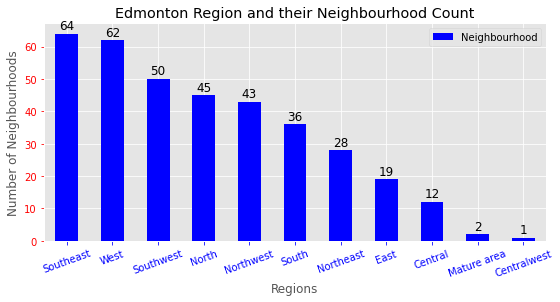

In [892]:
print(pivot_count)
pivot_count = pivot_count.sort_values(['Neighbourhood'], ascending = False, axis = 0)
ax=pivot_count.plot(kind='bar',figsize=(9, 4), rot=20, color=my_colors)
#set descriptions
ax.set_ylabel('Number of Neighbourhoods')
ax.set_xlabel('Regions')
ax.set_title('Edmonton Region and their Neighbourhood Count')
#set tick colors
ax=plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
for p in ax.patches:
    ax.annotate(str(p.get_height()), #annotate bar with values ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

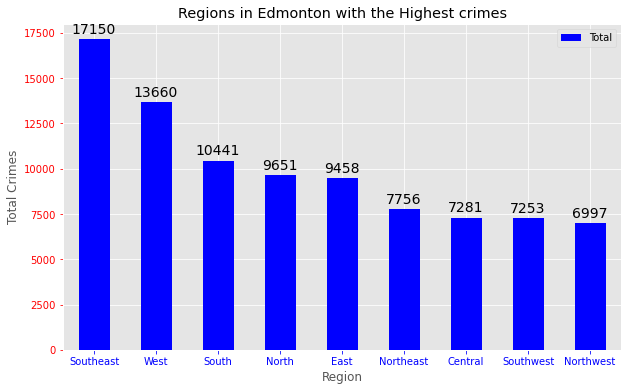

In [893]:
per_region = edm_crime_piv[['Borough','Total']]

per_region.set_index('Borough',inplace = True)

ax = per_region.plot(kind='bar', figsize=(10, 6), rot=0, color='b')

ax.set_ylabel('Total Crimes')
ax.set_xlabel('Region')
ax.set_title('Regions in Edmonton with the Highest crimes')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### Based on exploratory data analysis it is clear that Northwest has the lowest crimes. Next to northwest is Southwest and Central with minimal increase in crime rate compared to Northwest.

##### **Northwest** has *43 Neighbourhoods* opening a commercial establishment in this region is an optimal idea. However **Southwest** has *50 neighbourhoods* that has bottom *2nd position* in the crime rate and Central has only 12 neighbourhoods that holds bottom 3rd position in the crime rate.  Lets compare different types of crime recorded in Northwest and Southwest to further support our decision making process.

#### Different types of crimes recorded in the Northwest, Southwest, Central Regions

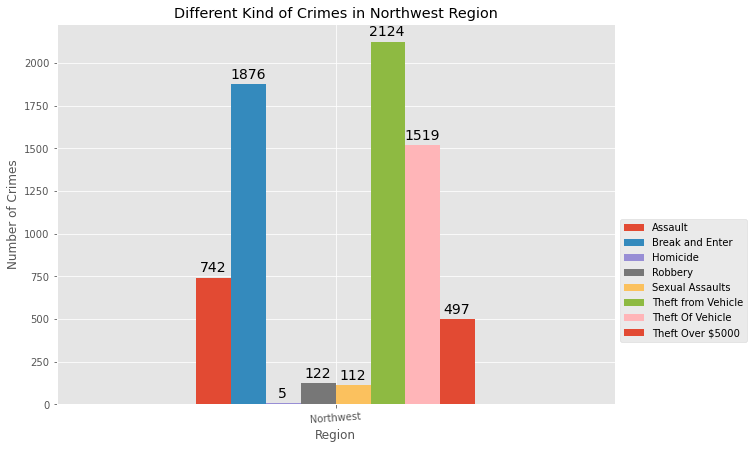

In [944]:
edm_nw_df = edm_crime_pivot[edm_crime_pivot['Region'] == 'Northwest']
#edm_nw_df=edm_crime_pivot.iloc[7:3]
#print(edm_nw_df)

edm_nw_df = edm_nw_df.sort_values(['Total'], ascending = True, axis = 0)

edm_nw = edm_nw_df[['Region','Assault', 'Break and Enter','Homicide','Robbery',
                 'Sexual Assaults','Theft from Vehicle','Theft Of Vehicle',
                 'Theft Over $5000']]


edm_nw.set_index('Region',inplace = True)

ax = edm_nw.plot(kind='bar', figsize=(10, 7), rot=4)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Region')
ax.set_title('Different Kind of Crimes in Northwest Region')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

#### Lets compare crime types for the bottom 3 region with less crime

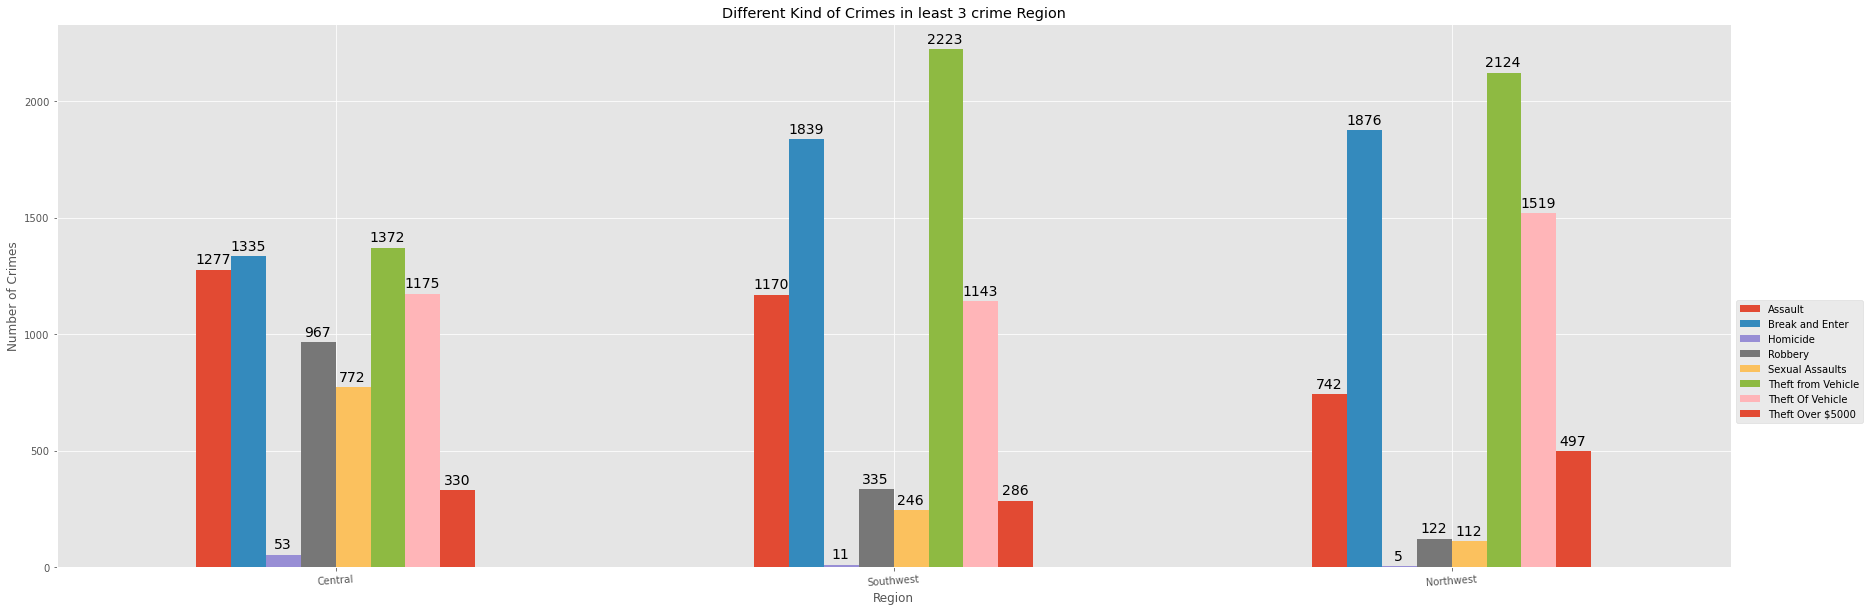

In [895]:

edm_nw_df=edm_crime_pivot.iloc[7:10]
edm_nw1 = edm_nw_df[['Region','Assault', 'Break and Enter','Homicide','Robbery',
                 'Sexual Assaults','Theft from Vehicle','Theft Of Vehicle',
                 'Theft Over $5000']]
edm_nw1.set_index('Region',inplace = True)
ax = edm_nw1.plot(kind='bar', figsize=(30, 10), rot=4)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Region')
ax.set_title('Different Kind of Crimes in least 3 crime Region')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

#### *Southwest has more neighbourhoods when compared to Northwest* and moreover the crime type *Break and enter is also low compared to Northwest* which makes **Southwest** region ideal destination for opening of commercial establishments

### **Part 3**: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.<a name="part3"></a>: 

#### This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

##### Restricting the rows in the data frame to only those with Southwest side as Borough (Region)

In [896]:
edm_sw_neigh = edm_boroughs_crime

#vnc_ws_neigh.drop(['Type','Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)
edm_sw_neigh = edm_sw_neigh[edm_sw_neigh['Borough'] == 'Southwest']
edm_sw_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in Southwest Borough', len(edm_sw_neigh['Neighbourhood'].unique()))

edm_sw_neigh['Neighbourhood'].unique()

Number of Neighbourhoods in Southwest Borough 50


array(['AMBLESIDE', 'BEARSPAW', 'BLACKBURNE', 'BLACKMUD CREEK',
       'BLUE QUILL', 'BRANDER GARDENS', 'BROOKSIDE', 'BULYEA HEIGHTS',
       'CHAPPELLE AREA', 'ERMINESKIN', 'FALCONER HEIGHTS', 'HADDOW',
       'HODGSON', 'KEHEEWIN', 'LEGER', 'MACEWAN', 'RAMSAY HEIGHTS',
       'RHATIGAN RIDGE', 'RUTHERFORD', 'SKYRATTLER', 'SOUTH TERWILLEGAR',
       'STEINHAUER', 'SWEET GRASS', 'TERWILLEGAR TOWNE', 'TWIN BROOKS',
       'WHITEMUD CREEK RAVINE NORTH', 'WHITEMUD CREEK RAVINE SOUTH',
       'WINDERMERE', 'BLUE QUILL ESTATES', 'CARTER CREST', 'CASHMAN',
       'CAVANAGH', 'DESROCHERS AREA', 'HENDERSON ESTATES', 'MACTAGGART',
       'MAGRATH HEIGHTS', 'OGILVIE RIDGE', 'RICHFORD', 'ALLARD',
       'CALLAGHAN', 'WINDERMERE AREA', 'RIVER VALLEY TERWILLEGAR',
       'GLENRIDDING AREA', 'HERITAGE VALLEY TOWN CENTRE AREA', 'PAISLEY',
       'RIVER VALLEY WINDERMERE', 'GRAYDON HILL', 'KESWICK AREA',
       'HAYS RIDGE AREA', 'BLACKMUD CREEK RAVINE'], dtype=object)

##### Creating a new Data frame with Lat, Lng being fetched from OpenCage geocoder

In [780]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = edm_sw_neigh['Neighbourhood'].unique()



key = '584a45af8e9b4a22add73c00bfdd2291'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Edmonton, AB, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('Southwest')
print(Latitude, Longitude)

[53.4299037, 53.4433422, 53.4311022, 53.4248636, 53.4595977, 53.494351, 53.4911989, 53.4749246, 53.403187, 53.4577179, 53.4667603, 53.4559957, 53.4584829, 53.4503518, 53.4579058, 53.4284634, 53.4832681, 53.4748536, 53.4184339, 53.4511439, 53.4400714, 53.4644121, 53.4642447, 53.449378, 53.4427779, 53.4901946, 53.4683773, 53.4232375, 53.4579078, 53.4639327, 53.4180268, 53.4077081, 53.3993676, 53.467428, 53.4381996, 53.4483416, 53.4638163, 53.42689, 53.4002615, 53.4079575, 53.4232375, 53.4768501, 53.4206652, 53.4071689, 53.4139488, 53.4418565, 53.4211791, 53.4190007, 53.4167854, 53.4467381] [-113.599337, -113.50113, -113.501211, -113.4988758, -113.526675, -113.5777374, -113.566713, -113.569509, -113.582183, -113.505378, -113.589507, -113.596499, -113.5595987, -113.504885, -113.576338, -113.527412, -113.579152, -113.588563, -113.528997, -113.523336, -113.578988, -113.504971, -113.528255, -113.579936, -113.53045, -113.5590269, -113.5601504, -113.6167789, -113.539201, -113.577977, -113.49950

#### Glimpse of the new Data Frame with Neighborhoods in Southwest region of Edmonton along with centroid of their co-ordinates

In [897]:
sw_neig_dict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
sw_neig_geo = pd.DataFrame(data=sw_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)

sw_neig_geo

,Neighbourhood,Borough,Latitude,Longitude
0,AMBLESIDE,Southwest,53.429904,-113.599337
1,BEARSPAW,Southwest,53.443342,-113.501130
2,BLACKBURNE,Southwest,53.431102,-113.501211
3,BLACKMUD CREEK,Southwest,53.424864,-113.498876
4,BLUE QUILL,Southwest,53.459598,-113.526675
5,BRANDER GARDENS,Southwest,53.494351,-113.577737
6,BROOKSIDE,Southwest,53.491199,-113.566713
7,BULYEA HEIGHTS,Southwest,53.474925,-113.569509
8,CHAPPELLE AREA,Southwest,53.403187,-113.582183
9,ERMINESKIN,Southwest,53.457718,-113.505378


#### Fetching the Geographical co-ordiantes of Southwest Edmonton to plot on Map

In [898]:
address = 'Edmonton, AB, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Edmonton, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edmonton, Canada are 53.535411, -113.507996.


In [910]:
#Create list with the Boroughs (to be used later)
boroughs = sw_neig_geo['Borough'].unique().tolist()
# This will color categorize each borough
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

#### Using Folium to plot Edmonton City's Southwest Borough and it's Neighborhoods

In [911]:
edm_sw_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(sw_neig_geo['Latitude'], sw_neig_geo['Longitude'], sw_neig_geo['Borough'], sw_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill=True,
        fill_color=borough_color[borough],
        fill_opacity=0.8,
        parse_html=False).add_to(edm_sw_map)  
    
edm_sw_map

### **Part 4**: Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.<a name="part4"></a>: 
#### This data will be fetched using **Four Square API** to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

#### Setting Up Foursquare Credentials

In [243]:
#Four Square Credentials

CLIENT_ID = 'R5VNXSAH2L51SPW0BM40JSYAJEMGHM3NE4NQWR34Y505PH3R'
CLIENT_SECRET = 'ASAKNDO3CPIZ123PARVTKOTOF0AU2WZ1L5EXB1MP2JM0EKDB'
VERSION = 20200514 # Foursquare API version

print('Credentials Stored')

Credentials Stored


In [244]:
sw_neig_geo.head(5)

,Neighbourhood,Borough,Latitude,Longitude
0,AMBLESIDE,Southwest,53.429904,-113.599337
1,BEARSPAW,Southwest,53.443342,-113.501130
2,BLACKBURNE,Southwest,53.431102,-113.501211
3,BLACKMUD CREEK,Southwest,53.424864,-113.498876
4,BLUE QUILL,Southwest,53.459598,-113.526675


#### Defining a function to fetch top 10 venues around Edmonton Southwest region neighborhood

In [245]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 10 
    radius = 500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Generating Venues for Southwest Edmonton Neighborhood using Foursquare API

In [247]:
#Get venues for all Southwest Edmonton neighborhoods in our dataset
EDMSW_venues = getNearbyVenues(names=sw_neig_geo['Neighbourhood'],
                                latitudes=sw_neig_geo['Latitude'],
                                longitudes=sw_neig_geo['Longitude'])

AMBLESIDE
BEARSPAW
BLACKBURNE
BLACKMUD CREEK
BLUE QUILL
BRANDER GARDENS
BROOKSIDE
BULYEA HEIGHTS
CHAPPELLE AREA
ERMINESKIN
FALCONER HEIGHTS
HADDOW
HODGSON
KEHEEWIN
LEGER
MACEWAN
RAMSAY HEIGHTS
RHATIGAN RIDGE
RIVER VALLEY RUNDLE
RUTHERFORD
SKYRATTLER
SOUTH TERWILLEGAR
STEINHAUER
SWEET GRASS
TERWILLEGAR TOWNE
TWIN BROOKS
WHITEMUD CREEK RAVINE NORTH
WHITEMUD CREEK RAVINE SOUTH
WINDERMERE
ANTHONY HENDAY SOUTH
BLUE QUILL ESTATES
CARTER CREST
CASHMAN
CAVANAGH
DESROCHERS AREA
HENDERSON ESTATES
MACTAGGART
MAGRATH HEIGHTS
OGILVIE RIDGE
RICHFORD
ALLARD
ANTHONY HENDAY TERWILLEGAR
CALLAGHAN
WINDERMERE AREA
RIVER VALLEY TERWILLEGAR
GLENRIDDING AREA
HERITAGE VALLEY TOWN CENTRE AREA
PAISLEY
RIVER VALLEY WINDERMERE
GRAYDON HILL
KESWICK AREA
HAYS RIDGE AREA
BLACKMUD CREEK RAVINE


In [912]:
EDMSW_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AMBLESIDE,53.429904,-113.599337,Rental Gladiators,53.433188,-113.601723,Construction & Landscaping
1,AMBLESIDE,53.429904,-113.599337,Ambleside Park,53.432911,-113.604124,Park
2,BEARSPAW,53.443342,-113.501130,Bears Paw Dog Park,53.440195,-113.504602,Outdoors & Recreation
3,BEARSPAW,53.443342,-113.501130,Bearspaw Lake,53.440056,-113.504465,Lake
4,BLACKBURNE,53.431102,-113.501211,Blackburne Park,53.429431,-113.497339,Playground
...,...,...,...,...,...,...,...
135,KESWICK AREA,53.419001,-113.636786,Rohit Communities | Keswick Single Family Home...,53.414668,-113.637663,Construction & Landscaping
136,HAYS RIDGE AREA,53.416785,-113.577041,Helping Hands Family Movers Inc,53.414494,-113.573356,Moving Target
137,BLACKMUD CREEK RAVINE,53.446738,-113.521741,7-Eleven,53.449085,-113.515486,Convenience Store
138,BLACKMUD CREEK RAVINE,53.446738,-113.521741,Bestbuy,53.446531,-113.517994,Electronics Store


In [822]:
# save our results to a file
EDMSW_venues.to_csv('edm_sw_venues.csv', encoding='utf-8', index=False)

In [913]:
edm_sw_venues = EDMSW_venues
edm_sw_venues.shape

(140, 7)

In [914]:
len(edm_sw_venues.Venue.unique())

122

### Let's check how many venues were returned for each neighborhood

In [915]:
edm_sw_grouped=edm_sw_venues.groupby('Neighborhood').count()
edm_sw_grouped.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALLARD,5,5,5,5,5,5
AMBLESIDE,2,2,2,2,2,2
ANTHONY HENDAY TERWILLEGAR,4,4,4,4,4,4
BEARSPAW,2,2,2,2,2,2
BLACKBURNE,2,2,2,2,2,2


#### How many unique venues are there?

In [916]:
print('There are {} uniques categories.'.format(len(edm_sw_venues['Venue Category'].unique())))

There are 67 uniques categories.


In [917]:
print("The Venue Categories are", edm_sw_venues['Venue Category'].unique())

The Venue Categories are ['Construction & Landscaping' 'Park' 'Outdoors & Recreation' 'Lake'
 'Playground' 'Gift Shop' 'Coffee Shop' 'Chinese Restaurant' 'Hotel'
 'Convenience Store' 'Gym' 'Pizza Place' 'School' 'Café' 'Home Service'
 'Soccer Field' 'Pub' 'Baby Store' 'Insurance Office' 'Grocery Store'
 'Smoothie Shop' 'Asian Restaurant' 'Sandwich Place'
 'Fast Food Restaurant' 'Indian Restaurant' 'Yoga Studio' 'Restaurant'
 'Discount Store' 'Wine Shop' 'Japanese Restaurant' 'Ice Cream Shop'
 'Tea Room' 'Salon / Barbershop' 'Bus Station' 'Liquor Store' 'Spa'
 'Cheese Shop' 'Skate Park' 'Snack Place' 'Paper / Office Supplies Store'
 'Shopping Mall' 'Italian Restaurant' 'Shoe Store' 'Cosmetics Shop'
 'Speakeasy' 'Miscellaneous Shop' 'Roof Deck' 'Bridal Shop'
 'Business Service' 'Nature Preserve' 'Trail' 'Motorcycle Shop'
 'Rental Car Location' 'Performing Arts Venue' 'BBQ Joint' 'Gas Station'
 'Stadium' 'Massage Studio' 'Golf Course' 'Tapas Restaurant' 'Pharmacy'
 'ATM' 'Dog Run' 'Dry Cl

##### Are there any Grocery Stores in the venues?

In [918]:
"Grocery Store" in edm_sw_venues['Venue Category'].unique()

True

#### One-Hot-Encoding to devise the Feature set

In [919]:
# one hot encoding
edm_onehot = pd.get_dummies(edm_sw_venues[['Venue Category']], prefix="", prefix_sep="")
edm_onehot
# add neighborhood column back to dataframe
edm_onehot['Neighborhood'] = edm_sw_venues['Neighborhood'] 
edm_onehot.head(3)
# move neighborhood column to the first column
fixed_columns = [edm_onehot.columns[-1]] + list(edm_onehot.columns[:-1])
edm_onehot = edm_onehot[fixed_columns]

edm_onehot.head()

,Neighborhood,ATM,Asian Restaurant,BBQ Joint,Baby Store,Bridal Shop,Bus Station,Business Service,Café,Cheese Shop,...,Snack Place,Soccer Field,Spa,Speakeasy,Stadium,Tapas Restaurant,Tea Room,Trail,Wine Shop,Yoga Studio
0,AMBLESIDE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AMBLESIDE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BEARSPAW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BEARSPAW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BLACKBURNE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [920]:
edm_onehot.shape

(140, 68)

#### Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [921]:
edm_grouped = edm_onehot.groupby('Neighborhood').mean().reset_index()
edm_grouped.head()

,Neighborhood,ATM,Asian Restaurant,BBQ Joint,Baby Store,Bridal Shop,Bus Station,Business Service,Café,Cheese Shop,...,Snack Place,Soccer Field,Spa,Speakeasy,Stadium,Tapas Restaurant,Tea Room,Trail,Wine Shop,Yoga Studio
0,ALLARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,AMBLESIDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,ANTHONY HENDAY TERWILLEGAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0
3,BEARSPAW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,BLACKBURNE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [922]:
edm_grouped.describe()

,ATM,Asian Restaurant,BBQ Joint,Baby Store,Bridal Shop,Bus Station,Business Service,Café,Cheese Shop,Chinese Restaurant,...,Snack Place,Soccer Field,Spa,Speakeasy,Stadium,Tapas Restaurant,Tea Room,Trail,Wine Shop,Yoga Studio
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.003401,0.002041,0.010204,0.005102,0.005102,0.004082,0.005102,0.005102,0.004082,0.009184,...,0.020408,0.006803,0.005102,0.004082,0.006803,0.005102,0.005102,0.005102,0.004082,0.005102
std,0.023810,0.014286,0.071429,0.035714,0.035714,0.028571,0.035714,0.035714,0.028571,0.045269,...,0.142857,0.047619,0.035714,0.028571,0.047619,0.035714,0.035714,0.035714,0.028571,0.035714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.166667,0.100000,0.500000,0.250000,0.250000,0.200000,0.250000,0.250000,0.200000,0.250000,...,1.000000,0.333333,0.250000,0.200000,0.333333,0.250000,0.250000,0.250000,0.200000,0.250000


In [923]:
edm_grouped.shape

(49, 68)

In [924]:
edm_grouped.head(3)

,Neighborhood,ATM,Asian Restaurant,BBQ Joint,Baby Store,Bridal Shop,Bus Station,Business Service,Café,Cheese Shop,...,Snack Place,Soccer Field,Spa,Speakeasy,Stadium,Tapas Restaurant,Tea Room,Trail,Wine Shop,Yoga Studio
0,ALLARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,AMBLESIDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,ANTHONY HENDAY TERWILLEGAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0


In [925]:
edm_sum_group=edm_grouped.sum(axis=0)
edm_sum_group

Neighborhood        ALLARDAMBLESIDEANTHONY HENDAY TERWILLEGARBEARS...
ATM                                                          0.166667
Asian Restaurant                                                  0.1
BBQ Joint                                                         0.5
Baby Store                                                       0.25
                                          ...                        
Tapas Restaurant                                                 0.25
Tea Room                                                         0.25
Trail                                                            0.25
Wine Shop                                                         0.2
Yoga Studio                                                      0.25
Length: 68, dtype: object

In [927]:
#creating a new dataset by taking the mean of frequency of occurences of Grocery store
ind = edm_grouped[["Neighborhood","Grocery Store"]]
ind.head() #.head() shows the first five rows only

,Neighborhood,Grocery Store
0,ALLARD,0.0
1,AMBLESIDE,0.0
2,ANTHONY HENDAY TERWILLEGAR,0.0
3,BEARSPAW,0.0
4,BLACKBURNE,0.0


#### Top 5 most common venues across Edmonton Southwest neighborhoods

In [928]:
num_top_venues = 5

for hood in edm_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = edm_grouped[edm_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALLARD----
                        venue  freq
0  Construction & Landscaping   0.4
1              Massage Studio   0.2
2                 Pizza Place   0.2
3                 Coffee Shop   0.2
4          Salon / Barbershop   0.0


----AMBLESIDE----
                        venue  freq
0  Construction & Landscaping   0.5
1                        Park   0.5
2                         ATM   0.0
3                    Pharmacy   0.0
4                  Restaurant   0.0


----ANTHONY HENDAY TERWILLEGAR----
                   venue  freq
0                   Park  0.25
1            Golf Course  0.25
2       Tapas Restaurant  0.25
3               Pharmacy  0.25
4  Performing Arts Venue  0.00


----BEARSPAW----
                   venue  freq
0                   Lake   0.5
1  Outdoors & Recreation   0.5
2                    ATM   0.0
3               Pharmacy   0.0
4             Restaurant   0.0


----BLACKBURNE----
                        venue  freq
0                  Playground   0.5
1  Construct

#### Now let's create the new dataframe and display the top 15 venues for each neighborhood.

In [929]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [930]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Proximity Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Proximity Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = edm_grouped['Neighborhood']

for ind in np.arange(edm_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(edm_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue
0,ALLARD,Construction & Landscaping,Massage Studio,Pizza Place,Coffee Shop,Yoga Studio,Golf Course,Garden Center,Gas Station,Gift Shop,Grocery Store,Electronics Store,Gym,Home Service,Hotel,Ice Cream Shop
1,AMBLESIDE,Park,Construction & Landscaping,Yoga Studio,Garden Center,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office
2,ANTHONY HENDAY TERWILLEGAR,Golf Course,Tapas Restaurant,Pharmacy,Park,Yoga Studio,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Grocery Store,Dry Cleaner,Gym,Home Service,Hotel,Ice Cream Shop
3,BEARSPAW,Outdoors & Recreation,Lake,Yoga Studio,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Golf Course,Home Service,Gym,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office
4,BLACKBURNE,Playground,Construction & Landscaping,Yoga Studio,Grocery Store,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office
5,BLACKMUD CREEK,Hotel,Gift Shop,Coffee Shop,Chinese Restaurant,Yoga Studio,Grocery Store,Garden Center,Gas Station,Golf Course,Gym,Electronics Store,Home Service,Ice Cream Shop,Indian Restaurant,Insurance Office
6,BLACKMUD CREEK RAVINE,Playground,Convenience Store,Electronics Store,Yoga Studio,Grocery Store,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office
7,BLUE QUILL,Convenience Store,Gym,Pizza Place,Grocery Store,Garden Center,Gas Station,Gift Shop,Golf Course,Yoga Studio,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office
8,BLUE QUILL ESTATES,Nature Preserve,Trail,Bridal Shop,Business Service,Gym,Garden Center,Gas Station,Gift Shop,Golf Course,Grocery Store,Yoga Studio,Home Service,Electronics Store,Hotel,Ice Cream Shop
9,BRANDER GARDENS,Chinese Restaurant,School,Home Service,Café,Yoga Studio,Garden Center,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Electronics Store,Hotel,Ice Cream Shop,Indian Restaurant


## *Now we will Cluster the Neighbourhoods*

### We will use k-means clustering. Setting number of clusters to be 5.

In [931]:
# set number of clusters
kclusters = 5

edm_grouped_clustering = edm_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(edm_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 2, 0, 2, 2, 2, 2, 2], dtype=int32)

In [932]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster_Label', kmeans.labels_)

edmonton_merged = sw_neig_geo

# merge toronto_grouped with Vancouver data to add latitude/longitude for each neighborhood
edmonton_merged = edmonton_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')


edmonton_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue
0,AMBLESIDE,Southwest,53.429904,-113.599337,0.0,Park,Construction & Landscaping,Yoga Studio,Garden Center,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office
1,BEARSPAW,Southwest,53.443342,-113.501130,2.0,Outdoors & Recreation,Lake,Yoga Studio,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Golf Course,Home Service,Gym,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office
2,BLACKBURNE,Southwest,53.431102,-113.501211,0.0,Playground,Construction & Landscaping,Yoga Studio,Grocery Store,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office
3,BLACKMUD CREEK,Southwest,53.424864,-113.498876,2.0,Hotel,Gift Shop,Coffee Shop,Chinese Restaurant,Yoga Studio,Grocery Store,Garden Center,Gas Station,Golf Course,Gym,Electronics Store,Home Service,Ice Cream Shop,Indian Restaurant,Insurance Office
4,BLUE QUILL,Southwest,53.459598,-113.526675,2.0,Convenience Store,Gym,Pizza Place,Grocery Store,Garden Center,Gas Station,Gift Shop,Golf Course,Yoga Studio,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office


In [935]:
#creating a new dataset by taking the mean of frequency of occurences of Grocery store
ind = edm_grouped[["Neighborhood","Grocery Store"]]
ind.head() #.head() shows the first five rows only

,Neighborhood,Grocery Store
0,ALLARD,0.0
1,AMBLESIDE,0.0
2,ANTHONY HENDAY TERWILLEGAR,0.0
3,BEARSPAW,0.0
4,BLACKBURNE,0.0


In [936]:
#Merging Grocery Store frequency to the clustered dataset to be used later to answer business question
edmonton_merged=edmonton_merged.join(ind.set_index('Neighborhood'), on='Neighbourhood',how='left', lsuffix='_left' )
edmonton_merged.head()
#edmonton_merged.shape

,Neighbourhood,Borough,Latitude,Longitude,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,...,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
0,AMBLESIDE,Southwest,53.429904,-113.599337,0.0,Park,Construction & Landscaping,Yoga Studio,Garden Center,Gas Station,...,Golf Course,Grocery Store,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
1,BEARSPAW,Southwest,53.443342,-113.501130,2.0,Outdoors & Recreation,Lake,Yoga Studio,Grocery Store,Fast Food Restaurant,...,Gas Station,Gift Shop,Golf Course,Home Service,Gym,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
2,BLACKBURNE,Southwest,53.431102,-113.501211,0.0,Playground,Construction & Landscaping,Yoga Studio,Grocery Store,Garden Center,...,Gift Shop,Golf Course,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
3,BLACKMUD CREEK,Southwest,53.424864,-113.498876,2.0,Hotel,Gift Shop,Coffee Shop,Chinese Restaurant,Yoga Studio,...,Garden Center,Gas Station,Golf Course,Gym,Electronics Store,Home Service,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
4,BLUE QUILL,Southwest,53.459598,-113.526675,2.0,Convenience Store,Gym,Pizza Place,Grocery Store,Garden Center,...,Gift Shop,Golf Course,Yoga Studio,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0


In [937]:
edmonton_merged=edmonton_merged.dropna()
edmonton_merged = edmonton_merged.reset_index(drop=True)
edmonton_merged

,Neighbourhood,Borough,Latitude,Longitude,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,...,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
0,AMBLESIDE,Southwest,53.429904,-113.599337,0.0,Park,Construction & Landscaping,Yoga Studio,Garden Center,Gas Station,...,Golf Course,Grocery Store,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
1,BEARSPAW,Southwest,53.443342,-113.501130,2.0,Outdoors & Recreation,Lake,Yoga Studio,Grocery Store,Fast Food Restaurant,...,Gas Station,Gift Shop,Golf Course,Home Service,Gym,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
2,BLACKBURNE,Southwest,53.431102,-113.501211,0.0,Playground,Construction & Landscaping,Yoga Studio,Grocery Store,Garden Center,...,Gift Shop,Golf Course,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
3,BLACKMUD CREEK,Southwest,53.424864,-113.498876,2.0,Hotel,Gift Shop,Coffee Shop,Chinese Restaurant,Yoga Studio,...,Garden Center,Gas Station,Golf Course,Gym,Electronics Store,Home Service,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
4,BLUE QUILL,Southwest,53.459598,-113.526675,2.0,Convenience Store,Gym,Pizza Place,Grocery Store,Garden Center,...,Gift Shop,Golf Course,Yoga Studio,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
5,BRANDER GARDENS,Southwest,53.494351,-113.577737,2.0,Chinese Restaurant,School,Home Service,Café,Yoga Studio,...,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Electronics Store,Hotel,Ice Cream Shop,Indian Restaurant,0.0
6,BROOKSIDE,Southwest,53.491199,-113.566713,2.0,Pub,Park,Soccer Field,Yoga Studio,Golf Course,...,Garden Center,Gas Station,Gift Shop,Grocery Store,Dry Cleaner,Gym,Home Service,Hotel,Ice Cream Shop,0.0
7,BULYEA HEIGHTS,Southwest,53.474925,-113.569509,2.0,Pizza Place,Baby Store,Park,Yoga Studio,Grocery Store,...,Gas Station,Gift Shop,Golf Course,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,0.0
8,CHAPPELLE AREA,Southwest,53.403187,-113.582183,2.0,Insurance Office,Yoga Studio,Dry Cleaner,Italian Restaurant,Indian Restaurant,...,Hotel,Home Service,Gym,Grocery Store,Golf Course,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
9,ERMINESKIN,Southwest,53.457718,-113.505378,3.0,Grocery Store,Coffee Shop,Yoga Studio,Fast Food Restaurant,Garden Center,...,Gift Shop,Golf Course,Gym,Dry Cleaner,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.5


### Exploring the neighborhood clusters in map

In [940]:
edmonton_merged['Cluster_Label'] =edmonton_merged['Cluster_Label'].astype(int)
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow=['red','purple','blue','green','orange']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(edmonton_merged['Latitude'], edmonton_merged['Longitude'], edmonton_merged['Neighbourhood'], edmonton_merged['Cluster_Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analysis

#### *How many Neighborhoods per Cluster?*

In [941]:
# How many neighborhoods in each cluster
edmonton_merged['Cluster_Label'].value_counts()

2    34
0     9
3     2
4     1
1     1
Name: Cluster_Label, dtype: int64

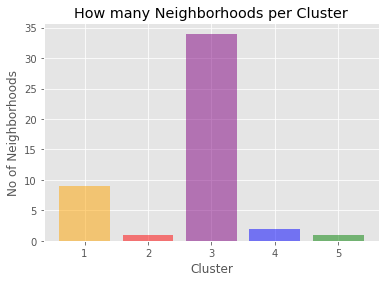

In [942]:
objects = (1,2,3,4,5)
y_pos = np.arange(len(objects))
performance = edmonton_merged['Cluster_Label'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster_Label'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.5, color=['orange','red','purple','blue','green'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')
# add the annotations
#for y, x in zip(performance, y_pos):
 #   plt.annotate(f'{y}\n', xy=(x, y), ha='center', va='center')

plt.show()

### Analysis of each cluster

### *Cluster1*

In [945]:
cluster1=edmonton_merged.loc[edmonton_merged['Cluster_Label'] == 0, edmonton_merged.columns[[0] + list(range(4, edmonton_merged.shape[1]))]]
cluster1

,Neighbourhood,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
0,AMBLESIDE,0,Park,Construction & Landscaping,Yoga Studio,Garden Center,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
2,BLACKBURNE,0,Playground,Construction & Landscaping,Yoga Studio,Grocery Store,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
25,WINDERMERE,0,Pub,Construction & Landscaping,Yoga Studio,Grocery Store,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
27,CARTER CREST,0,Construction & Landscaping,Yoga Studio,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Dry Cleaner,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
32,MACTAGGART,0,BBQ Joint,Construction & Landscaping,Yoga Studio,Gym,Garden Center,Gas Station,Gift Shop,Golf Course,Grocery Store,Home Service,Electronics Store,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
34,OGILVIE RIDGE,0,Construction & Landscaping,Yoga Studio,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Dry Cleaner,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
36,ALLARD,0,Construction & Landscaping,Massage Studio,Pizza Place,Coffee Shop,Yoga Studio,Golf Course,Garden Center,Gas Station,Gift Shop,Grocery Store,Electronics Store,Gym,Home Service,Hotel,Ice Cream Shop,0.0
38,WINDERMERE AREA,0,Pub,Construction & Landscaping,Yoga Studio,Grocery Store,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
44,KESWICK AREA,0,Construction & Landscaping,Yoga Studio,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Dry Cleaner,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0


### *Cluster 2*

In [946]:
cluster2=edmonton_merged.loc[edmonton_merged['Cluster_Label'] == 1, edmonton_merged.columns[[0] + list(range(4, edmonton_merged.shape[1]))]]
cluster2

,Neighbourhood,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
29,CAVANAGH,1,Restaurant,Grocery Store,Electronics Store,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Golf Course,Yoga Studio,Lake,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0


### *Cluster 3*

In [947]:
cluster3=edmonton_merged.loc[edmonton_merged['Cluster_Label'] == 2, edmonton_merged.columns[[0] + list(range(4, edmonton_merged.shape[1]))]]
cluster3

,Neighbourhood,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
1,BEARSPAW,2,Outdoors & Recreation,Lake,Yoga Studio,Grocery Store,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Golf Course,Home Service,Gym,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
3,BLACKMUD CREEK,2,Hotel,Gift Shop,Coffee Shop,Chinese Restaurant,Yoga Studio,Grocery Store,Garden Center,Gas Station,Golf Course,Gym,Electronics Store,Home Service,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
4,BLUE QUILL,2,Convenience Store,Gym,Pizza Place,Grocery Store,Garden Center,Gas Station,Gift Shop,Golf Course,Yoga Studio,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.0
5,BRANDER GARDENS,2,Chinese Restaurant,School,Home Service,Café,Yoga Studio,Garden Center,Gas Station,Gift Shop,Golf Course,Grocery Store,Gym,Electronics Store,Hotel,Ice Cream Shop,Indian Restaurant,0.0
6,BROOKSIDE,2,Pub,Park,Soccer Field,Yoga Studio,Golf Course,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Grocery Store,Dry Cleaner,Gym,Home Service,Hotel,Ice Cream Shop,0.0
7,BULYEA HEIGHTS,2,Pizza Place,Baby Store,Park,Yoga Studio,Grocery Store,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Electronics Store,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,0.0
8,CHAPPELLE AREA,2,Insurance Office,Yoga Studio,Dry Cleaner,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Golf Course,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0
10,FALCONER HEIGHTS,2,Pizza Place,Coffee Shop,Grocery Store,Smoothie Shop,Sandwich Place,Fast Food Restaurant,Indian Restaurant,Asian Restaurant,Hotel,Home Service,Gym,Electronics Store,Ice Cream Shop,Golf Course,Gift Shop,0.1
11,HADDOW,2,Yoga Studio,Park,Convenience Store,Pizza Place,Garden Center,Gas Station,Gift Shop,Golf Course,Grocery Store,Electronics Store,Gym,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,0.0
12,HODGSON,2,Wine Shop,Ice Cream Shop,Discount Store,Restaurant,Japanese Restaurant,Indian Restaurant,Hotel,Home Service,Gym,Insurance Office,Golf Course,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,0.0


### *Cluster 4*

In [948]:
cluster4=edmonton_merged.loc[edmonton_merged['Cluster_Label'] == 3, edmonton_merged.columns[[0] + list(range(4, edmonton_merged.shape[1]))]]
cluster4

,Neighbourhood,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
9,ERMINESKIN,3,Grocery Store,Coffee Shop,Yoga Studio,Fast Food Restaurant,Garden Center,Gas Station,Gift Shop,Golf Course,Gym,Dry Cleaner,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,0.5
41,HERITAGE VALLEY TOWN CENTRE AREA,3,Grocery Store,Yoga Studio,Dry Cleaner,Italian Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Golf Course,Gift Shop,Gas Station,Garden Center,Fast Food Restaurant,1.0


### *Cluster 5*

In [949]:
cluster5=edmonton_merged.loc[edmonton_merged['Cluster_Label'] == 4, edmonton_merged.columns[[0] + list(range(4, edmonton_merged.shape[1]))]]
cluster5

,Neighbourhood,Cluster_Label,1st Most Proximity Venue,2nd Most Proximity Venue,3rd Most Proximity Venue,4th Most Proximity Venue,5th Most Proximity Venue,6th Most Proximity Venue,7th Most Proximity Venue,8th Most Proximity Venue,9th Most Proximity Venue,10th Most Proximity Venue,11th Most Proximity Venue,12th Most Proximity Venue,13th Most Proximity Venue,14th Most Proximity Venue,15th Most Proximity Venue,Grocery Store
33,MAGRATH HEIGHTS,4,Fast Food Restaurant,Yoga Studio,Dry Cleaner,Italian Restaurant,Insurance Office,Indian Restaurant,Ice Cream Shop,Hotel,Home Service,Gym,Grocery Store,Golf Course,Gift Shop,Gas Station,Garden Center,0.0


### Determing the average number of grocery stores per cluster

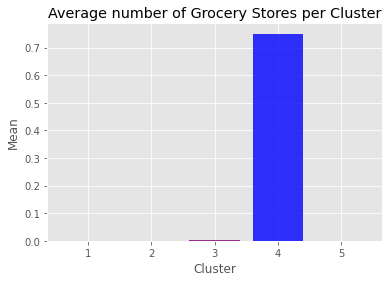

In [728]:
clusters_mean = [cluster1['Grocery Store'].mean(),cluster2['Grocery Store'].mean(),cluster3['Grocery Store'].mean(),
                 cluster4['Grocery Store'].mean(),cluster5['Grocery Store'].mean()]
objects = (1,2,3,4,5)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['orange','red','purple','blue','green'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Grocery Stores per Cluster')

plt.show()

### **Results and Discussion**

The objective of the business problem was to help stakeholders identify one of the safest borough(region) in Edmonton, and an appropriate neighborhood within the borough to set up a commercial establishment especially a Grocery store. This has been achieved by first making use of Edmonton crime data to identify a safe borough with considerable number of neighborhood for any business to be viable. After selecting the borough it was imperative to choose the right neighborhood where grocery shops were not among venues in a close proximity to each other. We achieved this by grouping the neighborhoods into clusters to assist the stakeholders by providing them with relavent data about venues and safety of a given neighborhood. 

Most of the grocery stores are in *cluster4* represented by *blue* clusters. The neighbourhoods *HERITAGE VALLEY TOWN CENTRE AREA, ERMINESKIN, FALCONER HEIGHTS* have highest average grocery stores. Even though there are huge amount of neighborhoods in *cluster3* and *cluster1*, there is little to no Grocery store. Looking at the nearby venues, the **optimum place to put a grocery store** are in __cluster3__ neighborhoods *HERITAGE VALLEY TOWN CENTRE AREA, ERMINESKIN, FALCONER HEIGHTS, HODGSON, RAMSAY HEIGHTS, RUTHERFORD, SKYRATTLER, SOUTH TERWILLEGAR, STEINHAUER, CASHMAN, DESROCHERS AREA, PAISLEY, GRAYDON HILL* as there are many Neighborhoods in the area but little to no grocery store therefore, eliminating any competition. Having **34 neighborhoods in the area with no Grocery store** gives a good opportunity for opening a new grocery store. This concludes the optimal finding for the project. I recommend the entrepreneur to open a grocery store in the above mentioned locations with no competitions. If the price and quality of the products are affordable and great, I m confident that the new grocery store will have great following.

#### **Conclusion**

We have explored the crime data to understand different types of crimes in all neighborhoods of Edmonton and later categorized them into different boroughs, this helped us group the neighborhoods into boroughs and choose the safest borough first. Once we confirmed the borough the number of neighborhoods for consideration also comes down, we further shortlist the neighborhoods based on the common venues, to choose a neighborhood which best suits the business problem.